In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


In [2]:
path = "D:\\uni\\2курс\\Аналіз_даних\\Month_Value_1.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [4]:
df.tail()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
91,01.08.2022,NaN,NaN,NaN,NaN
92,01.09.2022,NaN,NaN,NaN,NaN
93,01.10.2022,NaN,NaN,NaN,NaN
94,01.11.2022,NaN,NaN,NaN,NaN
95,01.12.2022,NaN,NaN,NaN,NaN


In [5]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
91    False
92    False
93    False
94    False
95    False
Length: 96, dtype: bool

In [6]:
df.isna().sum()

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

In [7]:
df = df.dropna()
df.isna().sum()

Period                                      0
Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
dtype: int64

In [8]:
df.columns.values

array(['Period', 'Revenue', 'Sales_quantity', 'Average_cost',
       'The_average_annual_payroll_of_the_region'], dtype=object)

In [9]:
df.describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


In [10]:
df.dtypes

Period                                       object
Revenue                                     float64
Sales_quantity                              float64
Average_cost                                float64
The_average_annual_payroll_of_the_region    float64
dtype: object

In [11]:
df['Period'].astype('datetime64[ns]')

0    2015-01-01
1    2015-01-02
2    2015-01-03
3    2015-01-04
4    2015-01-05
        ...    
59   2019-01-12
60   2020-01-01
61   2020-01-02
62   2020-01-03
63   2020-01-04
Name: Period, Length: 64, dtype: datetime64[ns]

In [12]:
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')
df.dtypes

Period                                      datetime64[ns]
Revenue                                            float64
Sales_quantity                                     float64
Average_cost                                       float64
The_average_annual_payroll_of_the_region           float64
dtype: object

In [13]:
df.index = pd.Index(df.Period)
df.index.freq = df.index.inferred_freq
df = df.drop(['Period', 'Revenue', 'Average_cost', 'The_average_annual_payroll_of_the_region'], axis=1)
df.head()

,Sales_quantity
Period,
2015-01-01,12729.0
2015-02-01,11636.0
2015-03-01,15922.0
2015-04-01,15227.0
2015-05-01,8620.0


In [14]:
plt.rcParams.update({'figure.figsize':(15,5)})

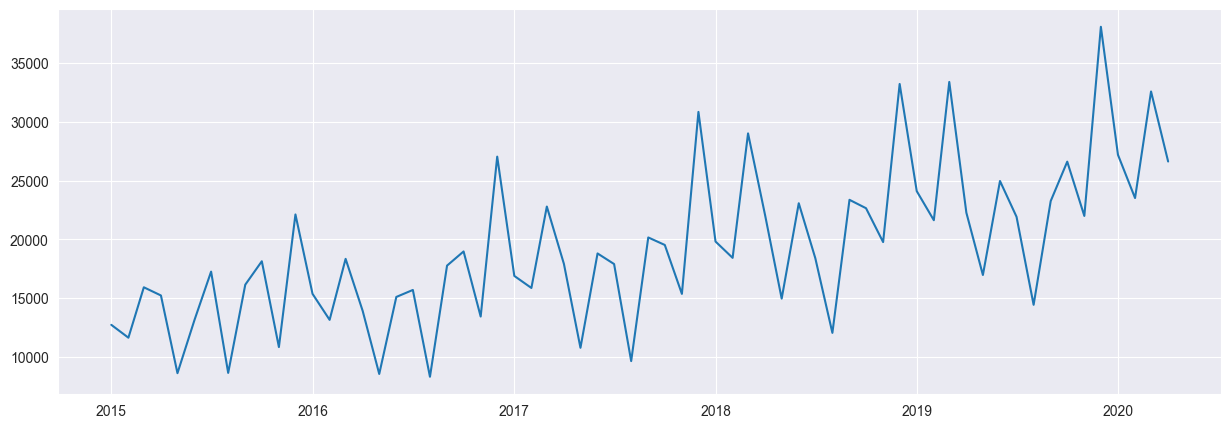

In [15]:
plt.plot(df)
plt.grid(True)
plt.show()

In [16]:
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

ACF and PACF plots

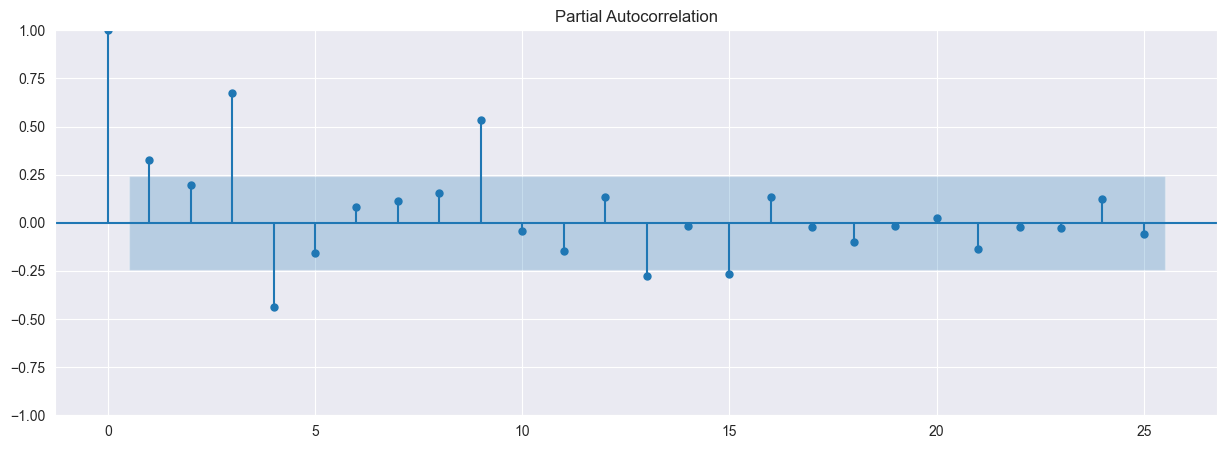

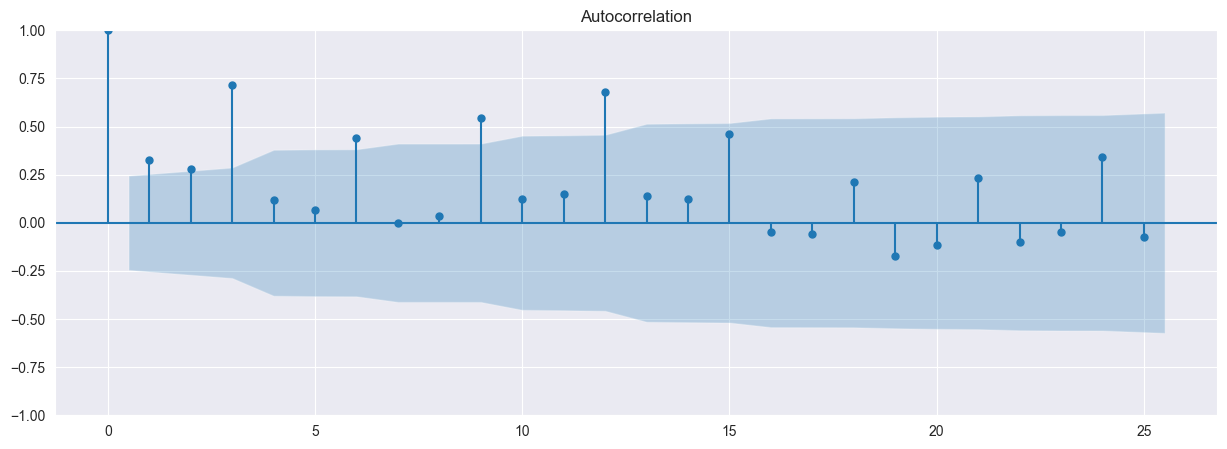

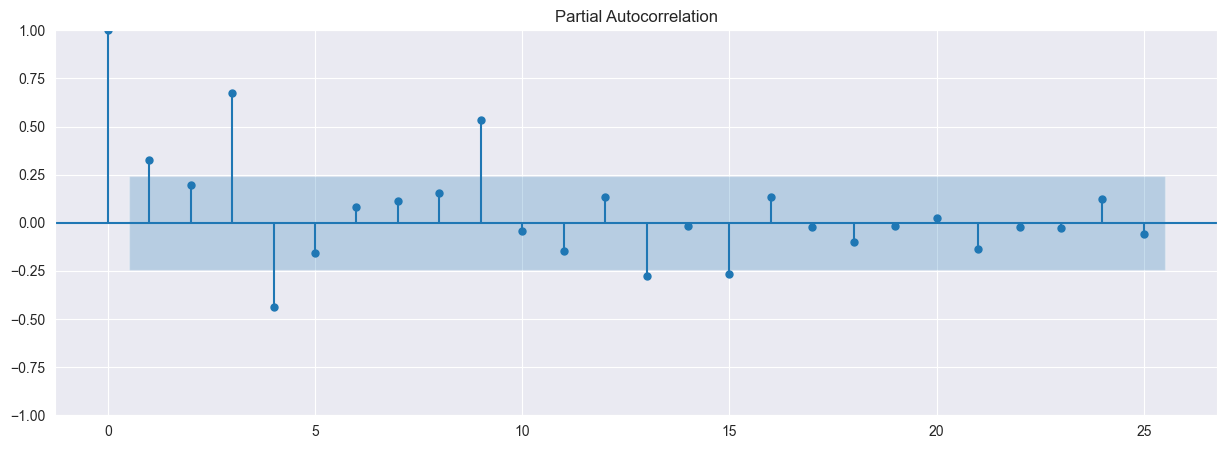

In [17]:
sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=25)
sm.graphics.tsa.plot_pacf(df, lags=25)

In [18]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

ARMA

In [19]:
from statsmodels.tsa.arima.model import ARIMA

order(p, d, q) -> ARMA(p, d)

p = 3, d = 1

In [20]:
arma_mod3 = ARIMA(train, order=(3,0,1)).fit()
arma_mod3.params

const     1.780990e+04
ar.L1    -6.240664e-02
ar.L2     9.713447e-02
ar.L3     7.976131e-01
ma.L1     3.067152e-01
sigma2    1.482582e+07
dtype: float64

In [21]:
sm.stats.durbin_watson(arma_mod3.resid.values)

np.float64(1.7716079920473047)

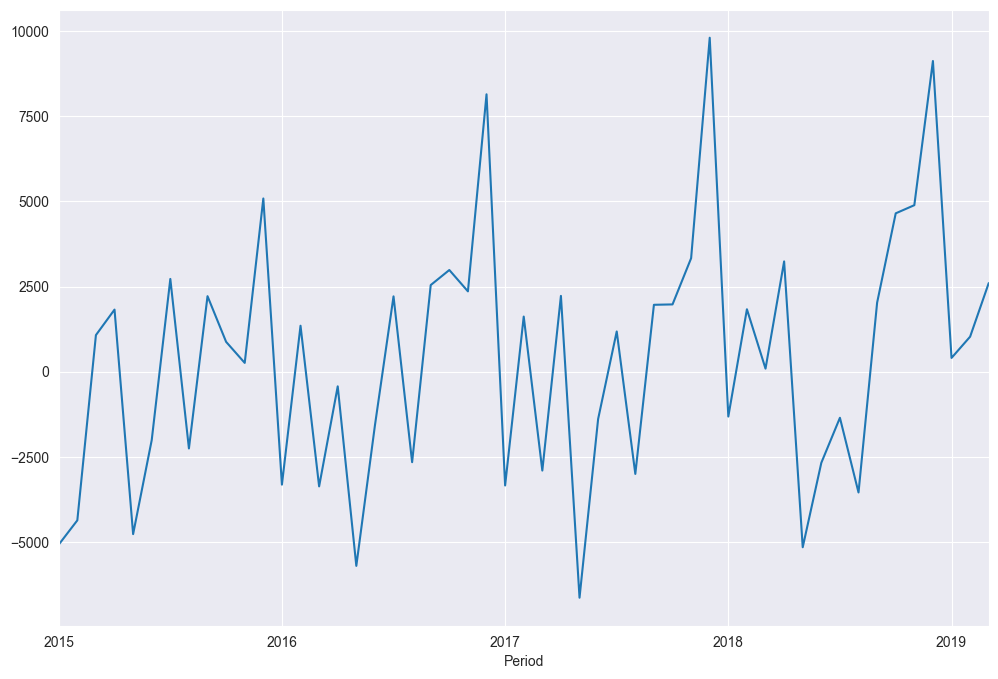

In [22]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = arma_mod3.resid.plot(ax=ax)

In [23]:
resid = arma_mod3.resid
stats.normaltest(resid)

NormaltestResult(statistic=np.float64(1.516525697999496), pvalue=np.float64(0.4684795402571419))

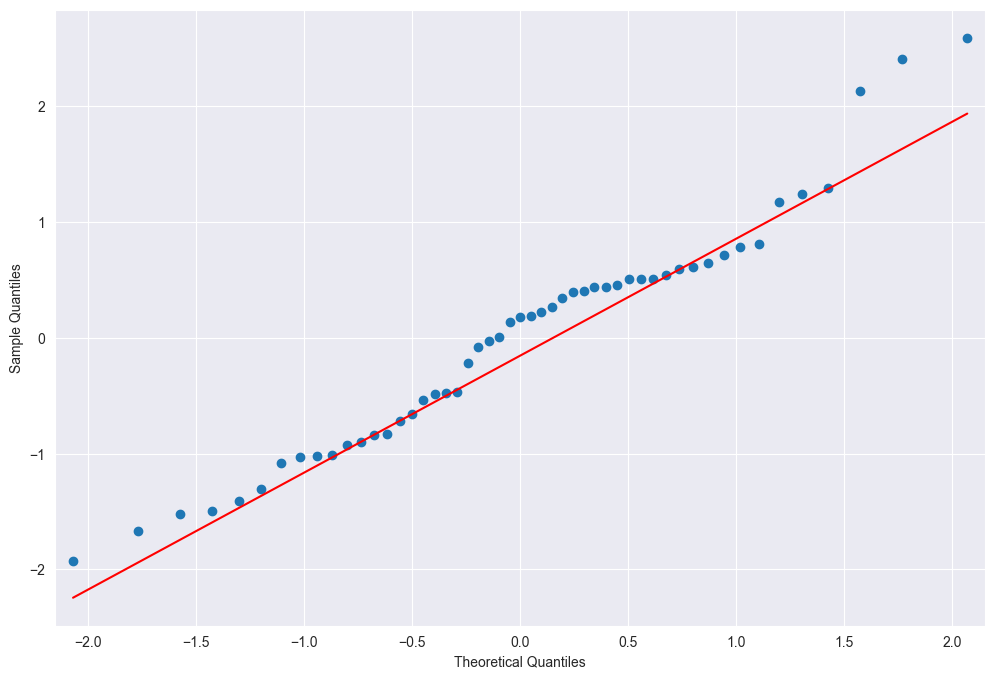

In [24]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)

In [25]:
forecast = arma_mod3.forecast(steps=len(test))

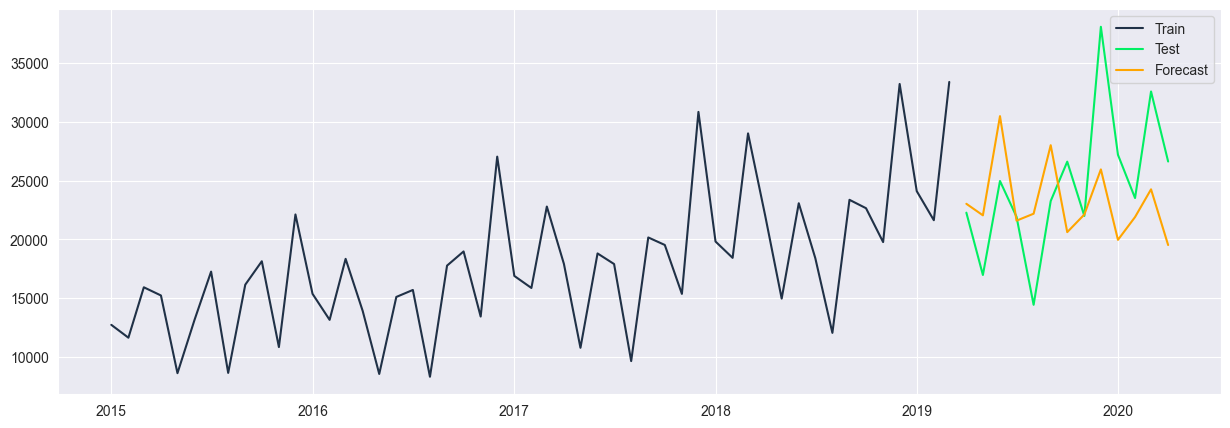

In [26]:
plt.plot(train.index, train, label='Train', color='#203147')
plt.plot(test.index, test, label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.legend()
plt.show()

In [27]:
mse = mean_squared_error(test, forecast)
print(f"MSE: {mse:.4f}")
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")

MSE: 38216706.3183
RMSE: 6181.9662


ARIMA

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

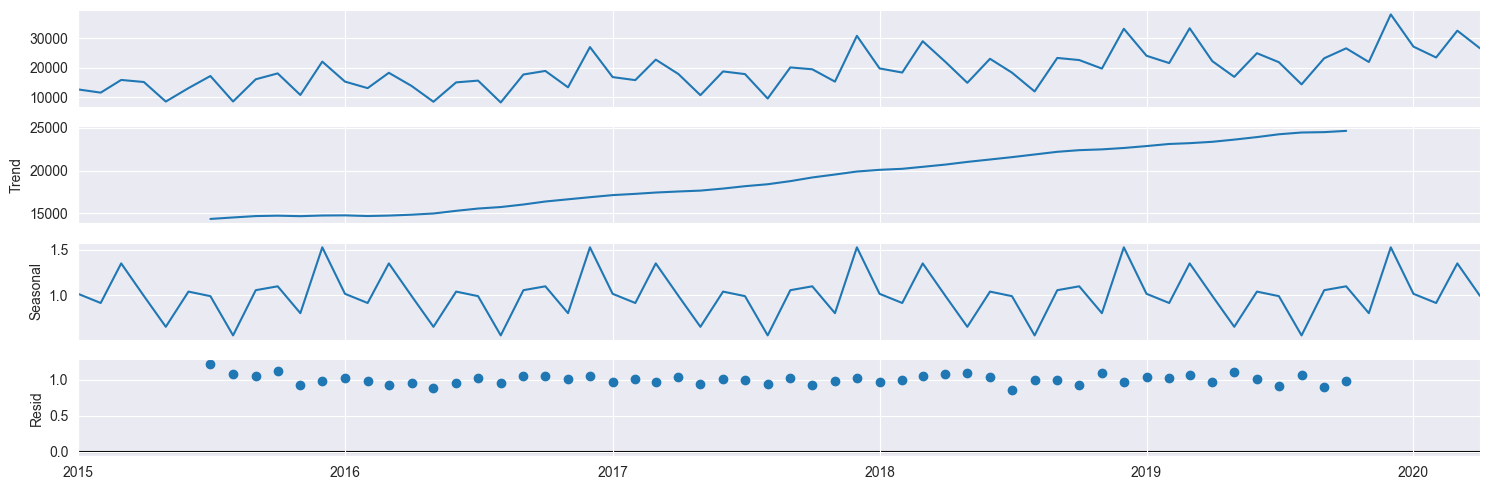

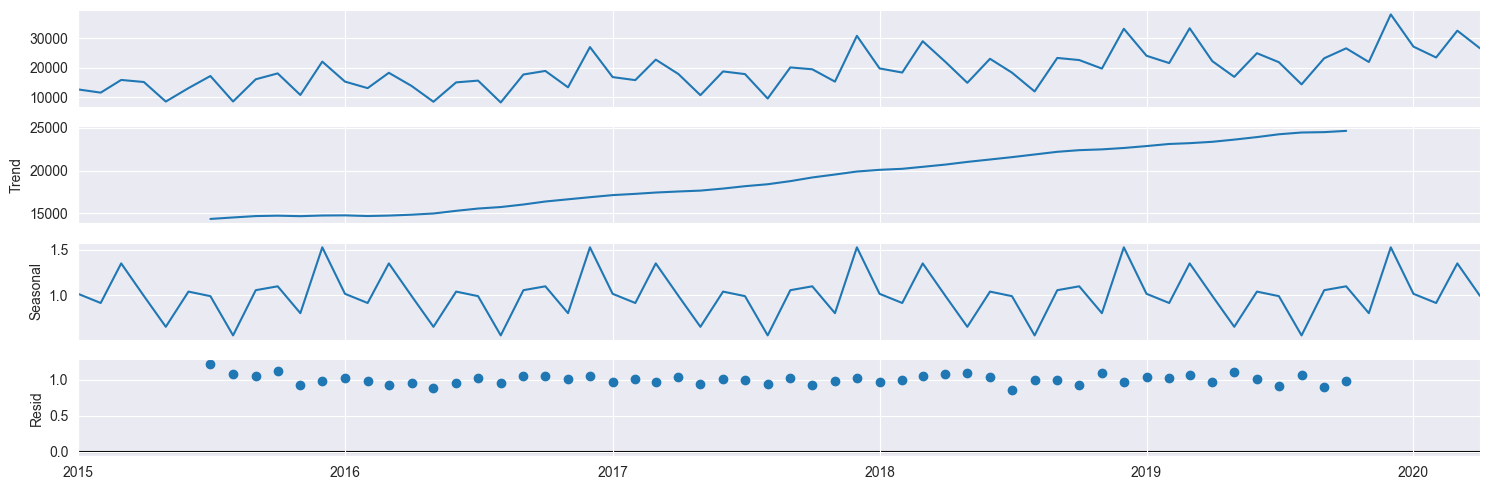

In [29]:
seas = seasonal_decompose(df, model ='multiplicative')
seas.plot()

In [30]:
arima_mod = ARIMA(train, order=(3,1,1)).fit()
arima_mod.params

ar.L1    -4.991606e-01
ar.L2    -3.337757e-01
ar.L3     4.379360e-01
ma.L1    -5.971164e-02
sigma2    1.257105e+07
dtype: float64

In [31]:
sm.stats.durbin_watson(arima_mod.resid.values)

np.float64(1.7681073988698301)

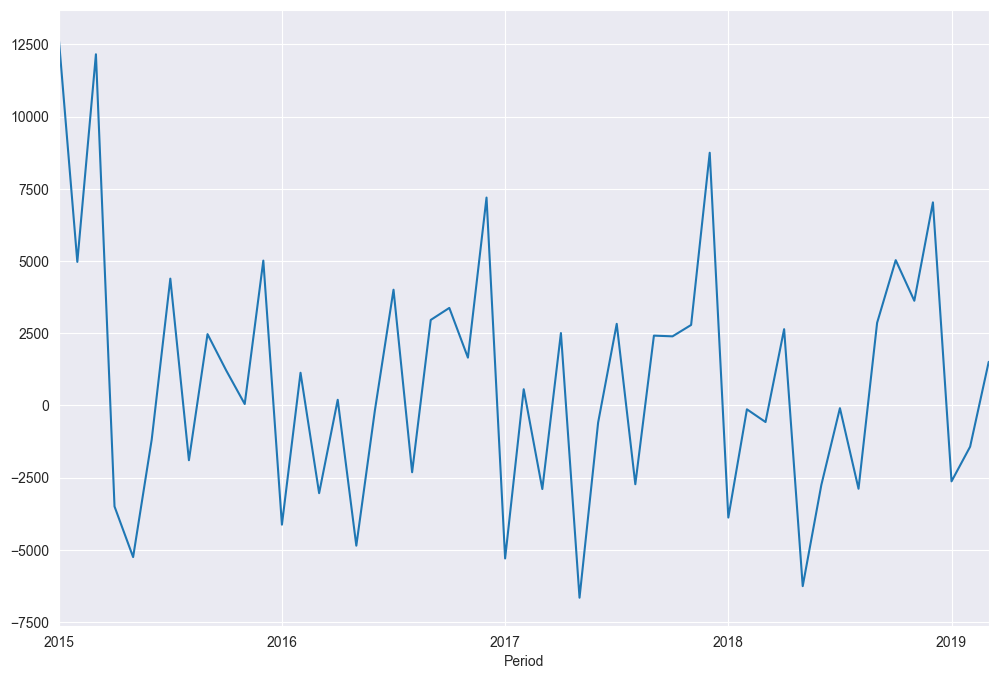

In [32]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = arima_mod.resid.plot(ax=ax)

In [33]:
resid = arima_mod.resid
stats.normaltest(resid)

NormaltestResult(statistic=np.float64(4.407621151095233), pvalue=np.float64(0.11038173799349166))

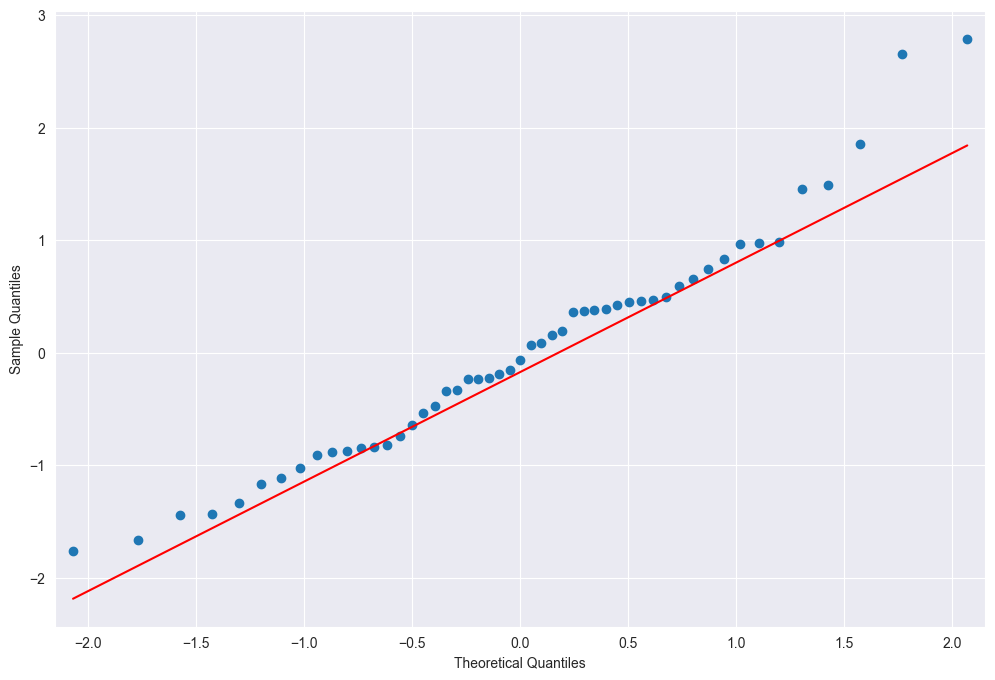

In [34]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)

In [35]:
forecast = arima_mod.forecast(steps=len(test))

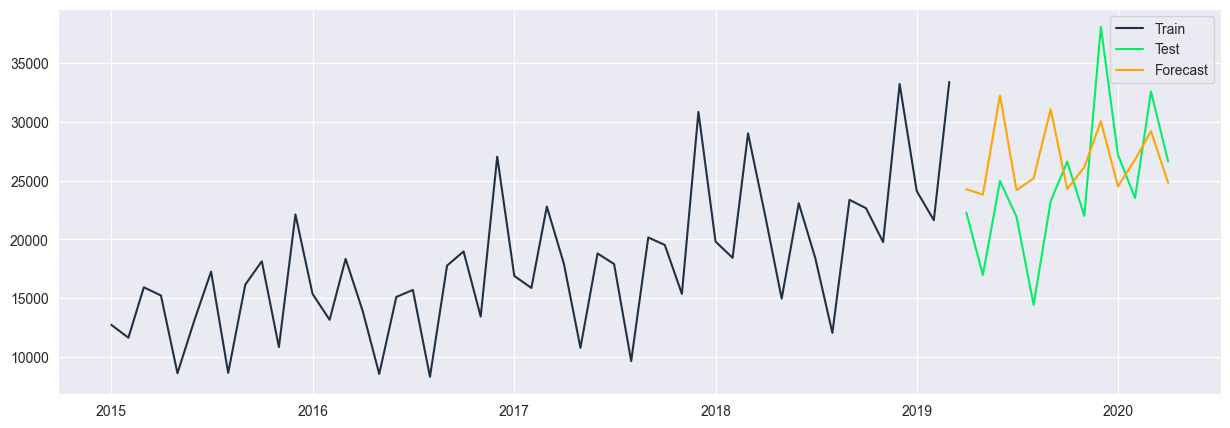

In [36]:
plt.plot(train.index, train, label='Train', color='#203147')
plt.plot(test.index, test, label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.legend()
plt.show()

In [37]:
mse = mean_squared_error(test, forecast)
print(f"MSE: {mse:.4f}")
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")

MSE: 31143743.8411
RMSE: 5580.6580


Експоненційне згладжування

In [38]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [39]:
exp_smooth = SimpleExpSmoothing(train).fit()
exp_smooth.params

C:\Users\User\scoop\apps\python310\current\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': np.float64(0.17767441860465116),
 'smoothing_trend': np.float64(nan),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': nan,
 'initial_level': np.float64(12729.0),
 'initial_trend': np.float64(nan),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [40]:
sm.stats.durbin_watson(exp_smooth.resid.values)

np.float64(2.2316107228394833)

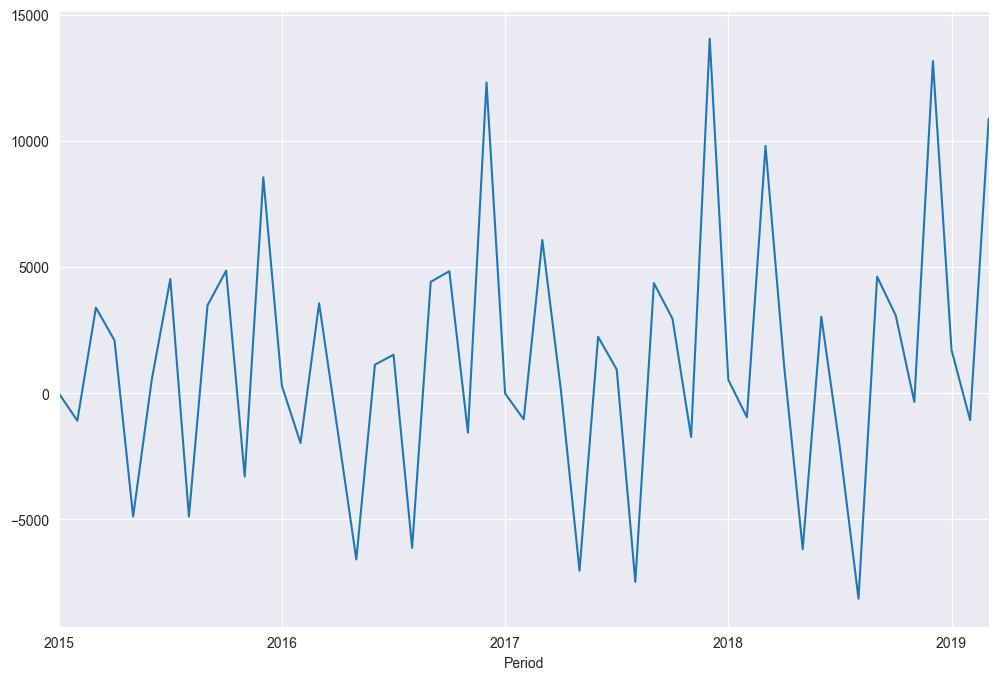

In [41]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = exp_smooth.resid.plot(ax=ax)

In [42]:
resid = exp_smooth.resid
stats.normaltest(resid)

NormaltestResult(statistic=np.float64(2.5144242412253894), pvalue=np.float64(0.28444592305651606))

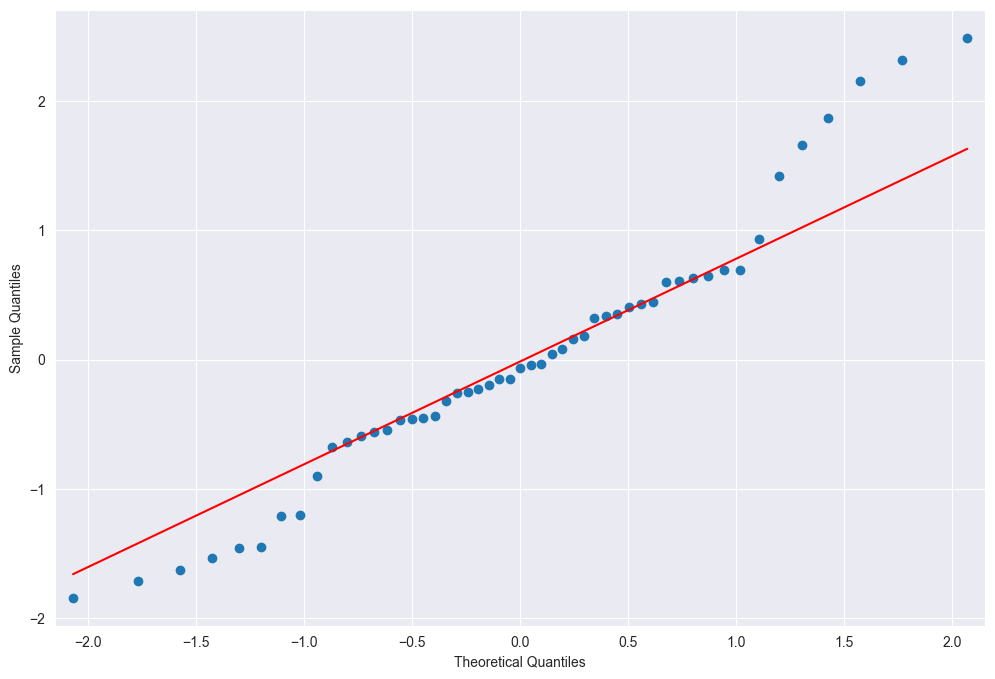

In [43]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)

In [44]:
forecast = exp_smooth.forecast(steps=len(test))

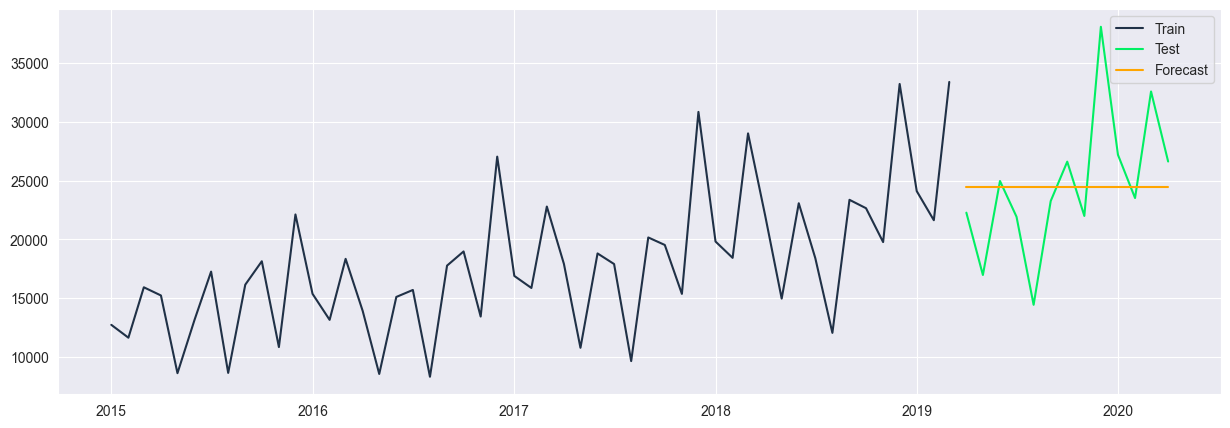

In [45]:
plt.plot(train.index, train, label='Train', color='#203147')
plt.plot(test.index, test, label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.legend()
plt.show()

In [46]:
mse = mean_squared_error(test, forecast)
print(f"MSE: {mse:.4f}")
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")

MSE: 34190981.3453
RMSE: 5847.3055


Експоненційне згладжування Холт-Вінтера

In [47]:
from statsmodels.tsa.api import ExponentialSmoothing

In [48]:
model_triple = ExponentialSmoothing(train,
                                    seasonal_periods=12,
                                    trend='add',
                                    seasonal='add').fit()
model_triple.params

C:\Users\User\scoop\apps\python310\current\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': np.float64(0.39392857142857146),
 'smoothing_trend': np.float64(0.04376984126984127),
 'smoothing_seasonal': np.float64(0.00010000000000000002),
 'damping_trend': nan,
 'initial_level': np.float64(14431.488888888882),
 'initial_trend': np.float64(37.70429292929384),
 'initial_seasons': array([ -128.50694444, -1733.3125    ,  5681.89583333,    93.40972222,
        -6614.15972222,   667.14583333,   772.02083333, -7501.63194444,
         1376.39583333,  1952.17361111, -3893.39583333,  9327.96527778]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [49]:
sm.stats.durbin_watson(model_triple.resid.values)

np.float64(1.8472825700864852)

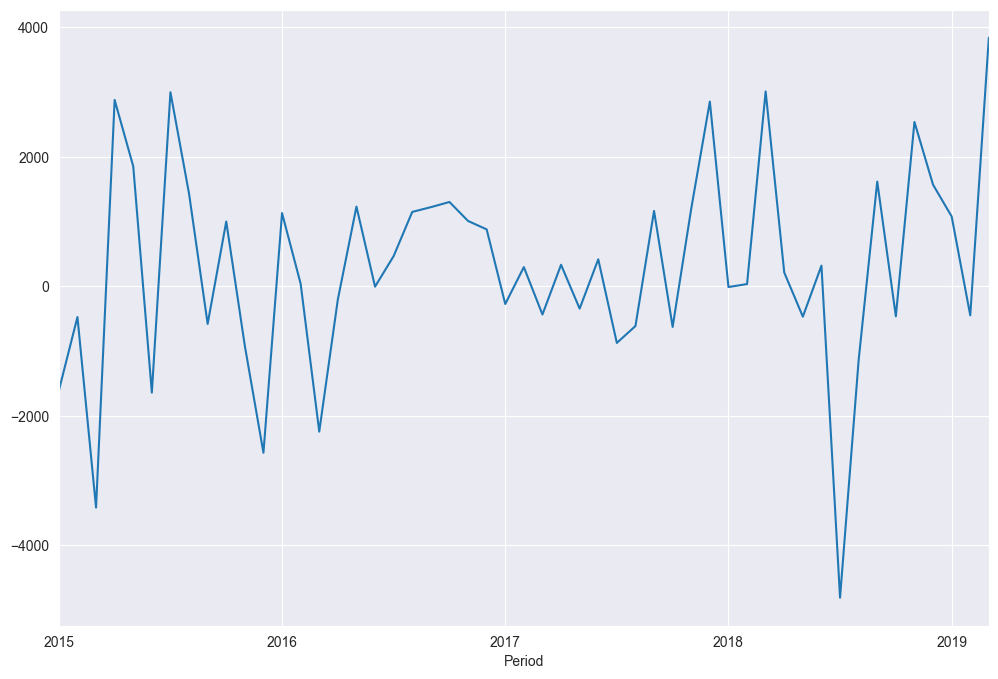

In [50]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = model_triple.resid.plot(ax=ax)

In [51]:
resid = model_triple.resid
stats.normaltest(resid)

NormaltestResult(statistic=np.float64(5.037951422029348), pvalue=np.float64(0.0805420628607237))

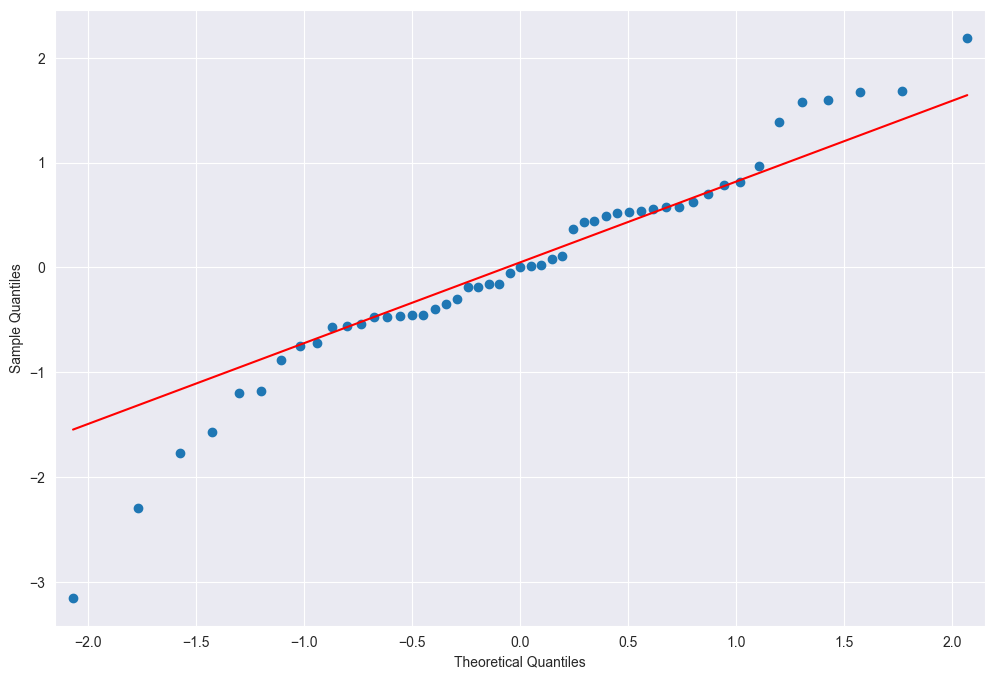

In [52]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)

In [53]:
forecast = model_triple.forecast(steps=len(test))

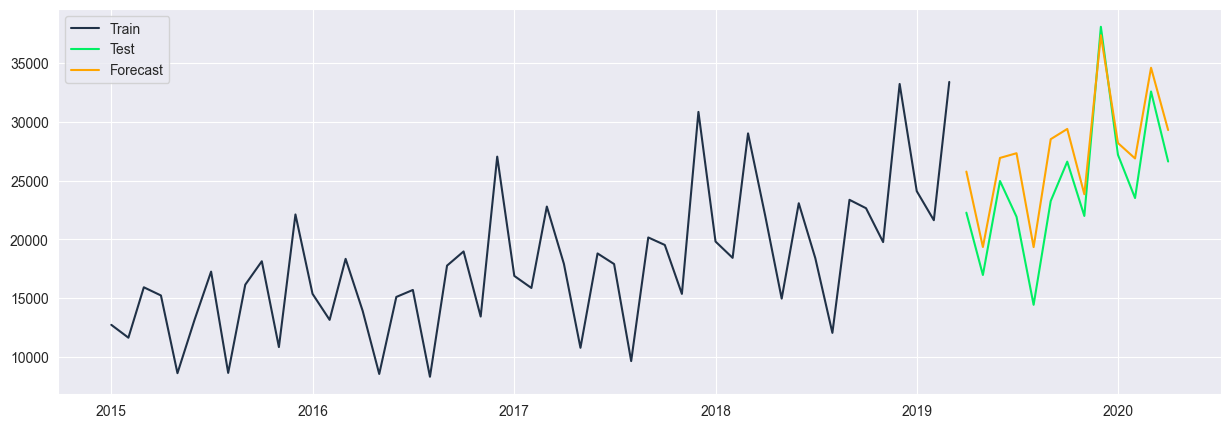

In [54]:
plt.plot(train.index, train, label='Train', color='#203147')
plt.plot(test.index, test, label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.legend()
plt.show()

In [55]:
mse = mean_squared_error(test, forecast)
print(f"MSE: {mse:.4f}")
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse:.4f}")

MSE: 10603873.9537
RMSE: 3256.3590


Просте ковзне середнє

In [56]:
df_1 = df.copy()
df_1['SMA'] = df_1['Sales_quantity'].rolling(5).mean()
df_1.dropna(inplace=True)
df_1

,Sales_quantity,SMA
Period,,
2015-05-01,8620.0,12826.8
2015-06-01,13160.0,12913.0
2015-07-01,17254.0,14036.6
2015-08-01,8642.0,12580.6
2015-09-01,16144.0,12764.0
2015-10-01,18135.0,14667.0
2015-11-01,10841.0,14203.2
2015-12-01,22113.0,15175.0
2016-01-01,15365.0,16519.6


<Axes: xlabel='Period'>

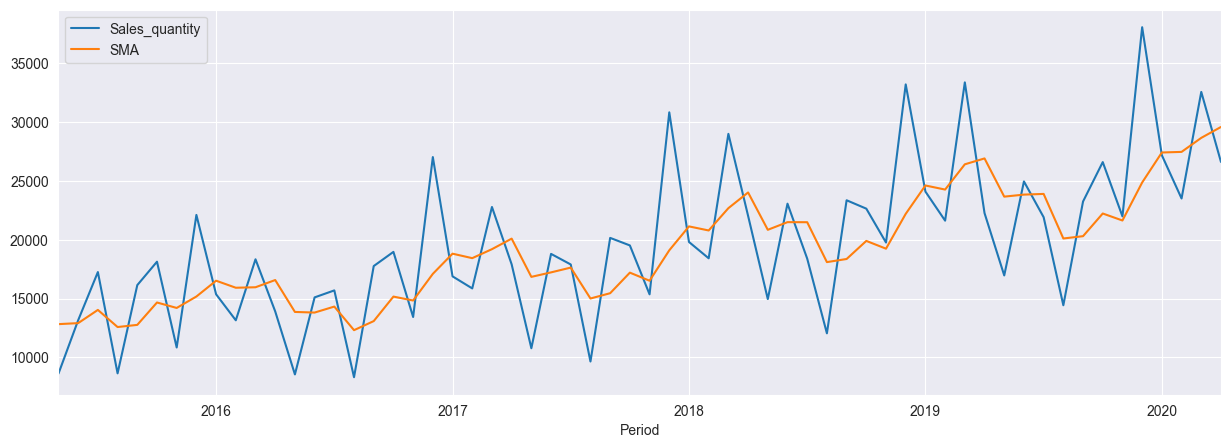

In [57]:
df_1[['Sales_quantity', 'SMA']].plot()

In [60]:
mse = mean_squared_error(df_1.Sales_quantity, df_1.SMA)
print(f"MSE: {mse:.4f}")
rmse = np.sqrt(mean_squared_error(df_1.Sales_quantity, df_1.SMA))
print(f"RMSE: {rmse:.4f}")

MSE: 21422292.2653
RMSE: 4628.4222


Експоненційне ковзне середнє

In [58]:
df_2 = df.copy()
df_2['EWMA'] = df_2['Sales_quantity'].ewm(span=5).mean()
df_2.dropna(inplace=True)
df_2

,Sales_quantity,EWMA
Period,,
2015-01-01,12729.0,12729.000000
2015-02-01,11636.0,12073.200000
2015-03-01,15922.0,13896.315789
2015-04-01,15227.0,14449.061538
2015-05-01,8620.0,12211.364929
...,...,...
2019-12-01,38069.0,27773.358230
2020-01-01,27184.0,27576.905487
2020-02-01,23509.0,26220.936991


<Axes: xlabel='Period'>

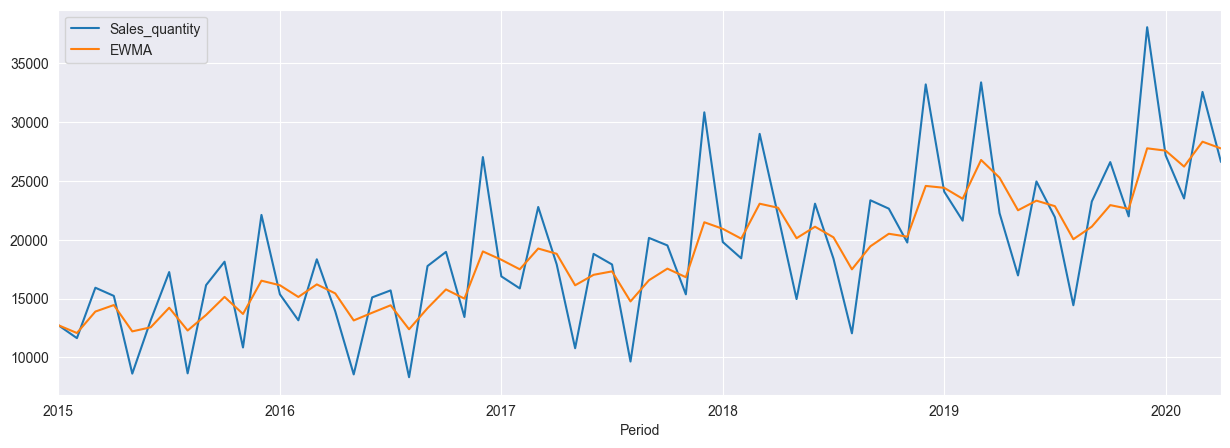

In [59]:
df_2[['Sales_quantity', 'EWMA']].plot()

In [62]:
mse = mean_squared_error(df_2.Sales_quantity, df_2.EWMA)
print(f"MSE: {mse:.4f}")
rmse = np.sqrt(mean_squared_error(df_2.Sales_quantity, df_2.EWMA))
print(f"RMSE: {rmse:.4f}")

MSE: 13921925.4642
RMSE: 3731.2097
